In [1]:
from driving.env import *
from driving.visualization import *
import math

from stable_baselines.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines import DQN

/home/robbizorg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/robbizorg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/robbizorg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/robbizorg/anaconda3/lib/python3.6/site-packages/tensorflow/python/f

In [6]:
env = DrivingEnv()

In [ ]:
def policy(s):
    d, theta = env.map.distance_angle_deg(s[0], s[1], s[2])
    return -200*d -2.0*theta

In [ ]:
h = plot_sim(env, policy)

In [2]:
def env_constructor():
    return DrivingEnv()

env = DummyVecEnv([lambda: env_constructor()])  # The algorithms require a vectorized environment to run

In [3]:
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

W0813 17:28:33.402413 140565983266624 deprecation_wrapper.py:119] From /home/robbizorg/anaconda3/lib/python3.6/site-packages/stable_baselines/common/tf_util.py:98: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0813 17:28:33.404502 140565983266624 deprecation_wrapper.py:119] From /home/robbizorg/anaconda3/lib/python3.6/site-packages/stable_baselines/common/tf_util.py:107: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0813 17:28:33.444579 140565983266624 deprecation_wrapper.py:119] From /home/robbizorg/anaconda3/lib/python3.6/site-packages/stable_baselines/deepq/dqn.py:123: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0813 17:28:33.446074 140565983266624 deprecation_wrapper.py:119] From /home/robbizorg/anaconda3/lib/python3.6/site-packages/stable_baselines/deepq/build_graph.py:358: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -57      |
| steps                   | 2891     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | -58.9    |
| steps                   | 5695     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 300      |
| mean 100 episode reward | -59.6    |
| steps                   | 8787     |
--------------------------------------


In [4]:
model.learn(total_timesteps=100000) # more learning

--------------------------------------
| % time spent exploring  | 79       |
| episodes                | 100      |
| mean 100 episode reward | -56.8    |
| steps                   | 2105     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 52       |
| episodes                | 200      |
| mean 100 episode reward | -58.9    |
| steps                   | 4875     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 19       |
| episodes                | 300      |
| mean 100 episode reward | -60.4    |
| steps                   | 8264     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 400      |
| mean 100 episode reward | -58.1    |
| steps                   | 13342    |
--------------------------------------
--------------------------------------
| % time spent exploring 

In [ ]:
model.save("deepq_track")

In [ ]:
# Load in a Model if it's already been trained for a bit
model = DQN.load("deepq_track", env)

In [7]:
# Example Policy that students should write using the step model from stable-baselines.DQN
# ALL POLICIES NOW ARE IN TERMS OF X,Y,& THETA
def cutePolicy(x,y,theta):
#     x = s[0]
#     y = s[1]
#     theta = s[2]
    
    best_a = 0
    best_q = -math.inf
    estimates = model.step_model.step([[x,y,theta],])[1][0]
#     print(estimates)
    for i in range(0, 5):
        if estimates[i] > best_q:
            best_q = estimates[i]
            best_a = i
            
    return env.actions[best_a]
        

In [ ]:
def dqnPolicy(x,y,theta):
    best_a = model.predict([x,y,theta])[0]
    return env.actions[best_a]

In [ ]:
dqnPolicy(0.5,0.5, 0)

In [ ]:
model.step_model.step([[10,10,0],])

In [ ]:
hist = plot_sim(env, cutePolicy)

In [ ]:
env2.actions

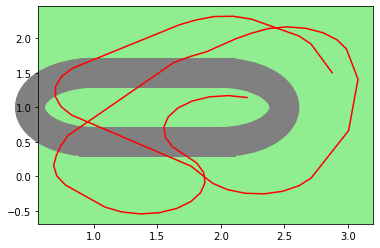

In [16]:
plot_episode(env,cutePolicy)

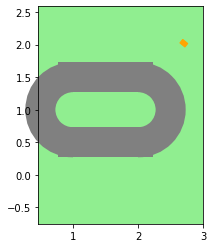

In [9]:
x = animate(env, cutePolicy, dt=0.2)

In [10]:
x

In [ ]:
# with open('animation.html', 'w') as f:
#     f.write(x.data)